In [219]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [220]:
filename = "/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_east_M7.34/flash_20210316_094807.828_0_xdmf.h5"

In [221]:
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

Keys: <KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']>


In [ ]:
#group = file['20']
#group

In [222]:
file = h5py.File(filename,'r')
#geometry = hdf5read(datadir,'/20/g');
#waterheight=h5py.File(filename,'/20/a/k');
#bathymetry=h5py.File(filename,'/20/a/b');
#waterlevel=h5py.File(filename,'20/a/h');

In [223]:
geometry = file['20/g']
geometry

<HDF5 dataset "g": shape (21264621, 2), type "<f8">

In [224]:
x = geometry[:,0]
y = geometry[:,1]
y

array([7291900.390625 , 7291900.390625 , 7291811.5234375, ...,
       7297143.5546875, 7297054.6875   , 7297054.6875   ])

In [249]:
x.shape

(21264621,)

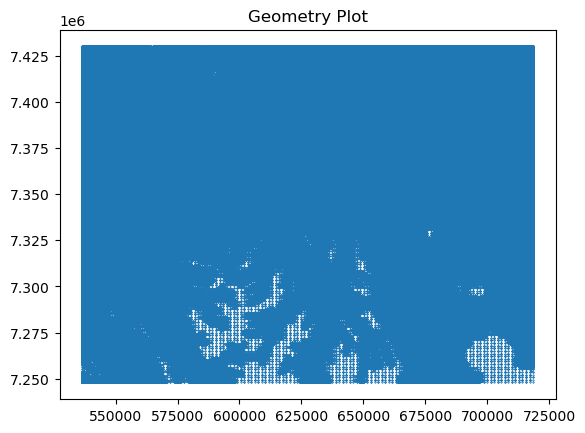

In [225]:
plt.scatter(x, y, s=0.1)
plt.title('Geometry Plot')
plt.show()

In [230]:
X, Y = np.meshgrid(x, y, sparse=True)

In [243]:
spacing = 150
x_range = np.arange(np.min(x), np.max(x) + spacing, spacing)
y_range = np.arange(np.min(y), np.max(y) + spacing, spacing)
X, Y = np.meshgrid(x_range, y_range)

In [244]:
X.shape

(1215, 1215)

In [292]:
waterheight = file['20/a/k']
waterheight

<HDF5 dataset "k": shape (7088207, 3), type "<f8">

In [293]:
wh0 = waterheight[:, 0]
wh1 = waterheight[:, 1]
wh2 = waterheight[:, 2]

In [294]:
wh = np.concatenate((wh0, wh1, wh2))

In [295]:
x.shape

(21264621,)

In [296]:
x

array([621457.03125  , 621545.8984375, 621545.8984375, ...,
       542631.8359375, 542631.8359375, 542542.96875  ])

In [298]:
waterheight_reshaped = np.reshape(waterheight, (geometry.shape[0], -1))

In [299]:
waterheight_reshaped

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [300]:
waterheight_reshaped.shape

(21264621, 1)

In [301]:
#waterheight_reshaped.flatten()
arr_reshaped = np.squeeze(waterheight_reshaped)

In [302]:
arr_reshaped

array([0., 0., 0., ..., 0., 0., 0.])

In [304]:
arr_reshaped.shape

(21264621,)

In [305]:
downsample_factor = 1000  # Adjust this value as needed
# Downsample x and y coordinates
downsampled_x = x[::downsample_factor]
downsampled_y = y[::downsample_factor]
downsampled_wh = arr_reshaped[::downsample_factor]
#downsampled_wh = waterheight_reshaped[::downsample_factor]

In [306]:
downsampled_x.shape

(21265,)

In [307]:
downsampled_wh.shape

(21265,)

In [308]:
X,Y = np.meshgrid(downsampled_x,downsampled_y)

ValueError: not enough values to unpack (expected 2, got 1)

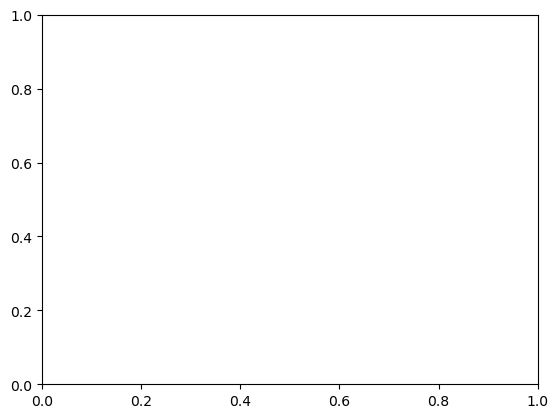

In [309]:
# Plot waterheight using pcolormesh
plt.pcolormesh(X, Y, downsampled_wh)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Water Height')
plt.show()

In [ ]:
bathymetry = file['20/a/b']
bathymetry

In [227]:
from scipy.interpolate import griddata

In [ ]:
# Extract x, y, and z coordinates - RELOAD BATHY!
bathy0 = bathymetry[:, 0]
bathy1 = bathymetry[:, 1]
bathy2 = bathymetry[:, 2]

In [ ]:
# Combine the arrays into one array
bathy = np.concatenate((bathy1, bathy2, bathy0))

In [ ]:
bathy[bathy>0] = 0

In [ ]:
plt.scatter(x, y, s=0.1, c=bathy, cmap='jet')
plt.colorbar(label='Bathymetry')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bathymetry Plot')
plt.show()

In [ ]:
x.shape

In [ ]:
len(x) + len(y) + len(z)

In [ ]:
len(geometry_data[:, 0])

In [ ]:
len(geometry_data[:, 1])

In [ ]:
bathy.shape

In [ ]:
geometry_data[:, 1].shape

In [ ]:
def hdf5read(file, dataset):
    with h5py.File(file, 'r') as f:
        data = f[dataset][()]
    return data

In [ ]:
geometry = hdf5read(filename, '/20/g')
waterheight = hdf5read(filename, '/20/a/k')
bathymetry = hdf5read(filename, '/20/a/b')

## Read .mat

In [310]:
from scipy.io import loadmat
import h5py

In [311]:
filename = '/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Script4Processing/samoa/simple_west_M734.mat'

In [312]:
file = h5py.File(filename,'r')
file

<HDF5 file "simple_west_M734.mat" (mode r)>

In [313]:
file.keys()

<KeysViewHDF5 ['BT', 'WH', 'WL', 'X', 'Y']>

In [322]:
BT = file['BT'][20]
WH = file['BT'][20]
X_coord = file['X'][20]
Y_coord = file['Y'][20]

In [321]:
WH.shape

(1473796,)

In [323]:
X_coord.shape

(1214,)

In [338]:
Z = BT * np.maximum(BT, 0) + WH

In [339]:
Z.shape

(1473796,)

In [340]:
reshaped_array = np.reshape(Z, (1214, 1214))
reshaped_array.shape

(1214, 1214)

In [358]:
test = np.reshape(BT, (1214, 1214))

In [355]:
# Determine the minimum and maximum values for the color limits
vmin = np.min(reshaped_array)
vmax = np.max(reshaped_array)
vmin

-683.8732953913593

In [359]:
vmin = np.min(test)
vmax = np.max(test)
vmin

-683.8732953913593

In [360]:
vmax

1460.408619639638

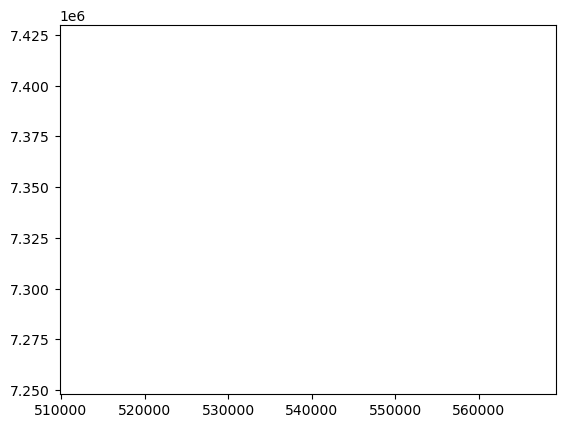

In [361]:
plt.pcolor(X_coord, Y_coord, test, shading="auto", vmin=vmin, vmax=vmax)